- Draft pour une visualisation rapide des chiffres de opencovid19-fr.
- Utilisé pour se faire une idée des tendances sur le pays ou par régions.
- Script à vérifier.

In [1]:
%run analysis_code.py

/Users/az02588/.virtualenvs/opencovid19/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
view_cumul = True
view_diff = False
verbose = False

keys = [
    #'cas_confirmes',  
    'deces', 
    #'deces_ehpad', 
    'reanimation', 
    'hospitalises', 
    'gueris', 
    #'depistes',
]

In [3]:
print('Les acronymes utilisés pour les régions sont: {}.'.format(', '.join(regions.keys())))

Les acronymes utilisés pour les régions sont: ara, bfc, bretagne, cvl, corse, hdf, grand-est, ile-de-france, normandie, na, occitanie, pdl, paca.


In [4]:
latest_data = pd.read_csv(data_url)

In [5]:
print('Les dernières données sont de : {}.'.format(latest_data.date.unique()[-1]))

Les dernières données sont de : 2020-04-09.


In [6]:
if verbose is True:
    latest_data.head()

## Données Santé Public France

In [7]:
spf_data = latest_data[latest_data.source_nom == 'Santé publique France Data']

if verbose is True:
    spf_data.head()

In [8]:
print('Il y a {} lignes et {} colonnes pour les données "Santé publique France Data".'.format(
    spf_data.shape[0], spf_data.shape[1]))

Il y a 2323 lignes et 15 colonnes pour les données "Santé publique France Data".


In [9]:
region_data = gen_region_ts(spf_data)

In [10]:
analysis_france = get_data_france(spf_data)

## Focus France

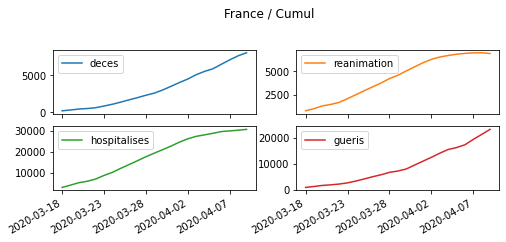

In [11]:
if view_cumul is True:
    get_plot_cumul_france_separate(analysis_france, keys=keys)

In [12]:
if view_diff is True:
    get_plot_diff_france_separate(analysis_france, keys=keys)

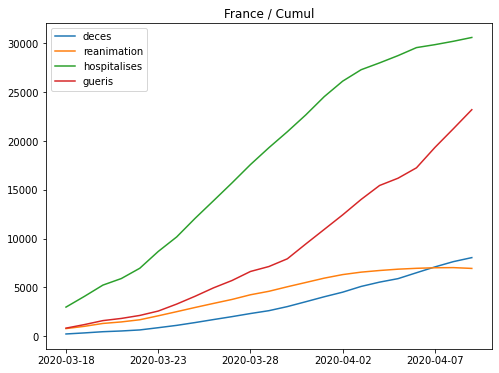

In [13]:
if view_cumul is True:
    get_plot_cumul_france_merged(analysis_france, keys=keys)

In [14]:
if view_diff:
    get_plot_diff_france_merged(analysis_france, keys=keys)

## Focus régions

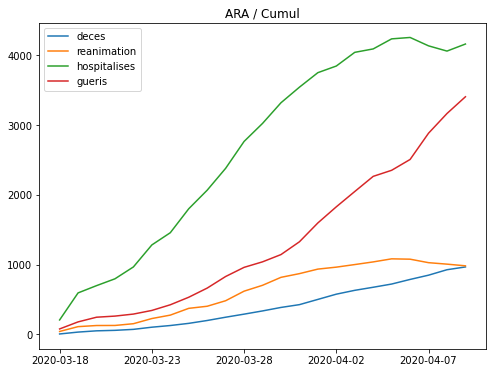

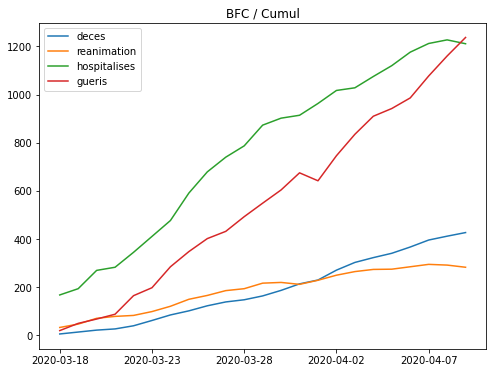

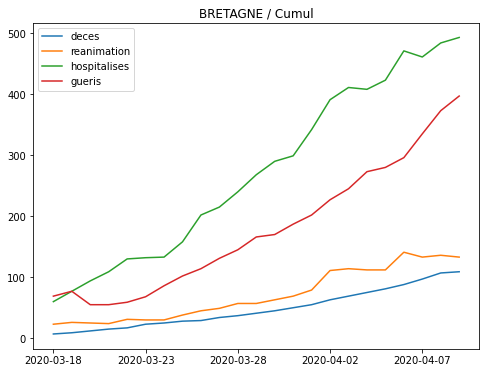

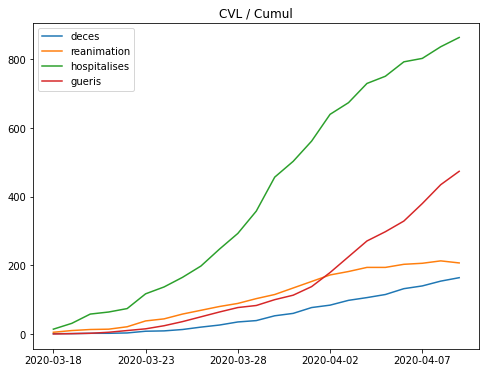

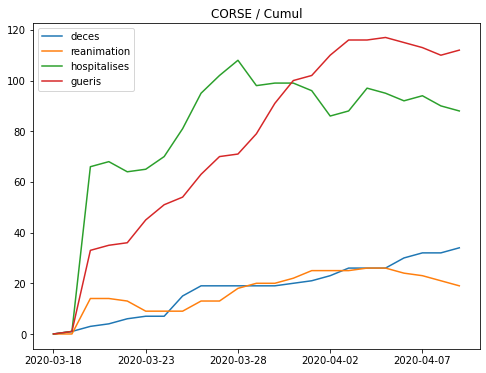

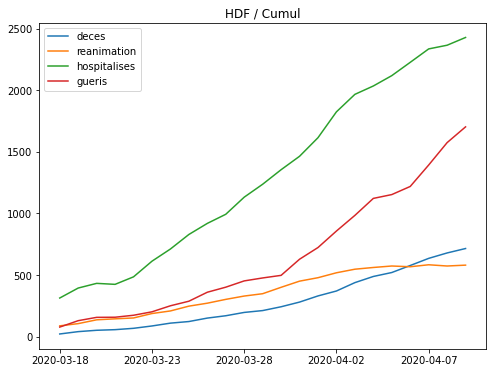

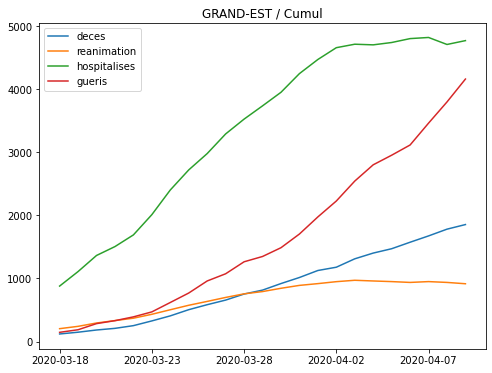

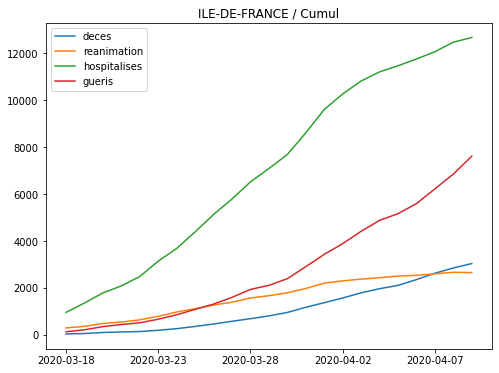

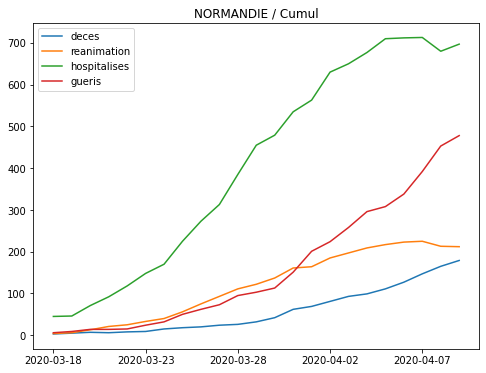

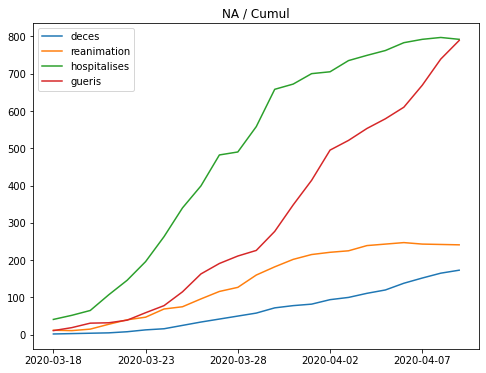

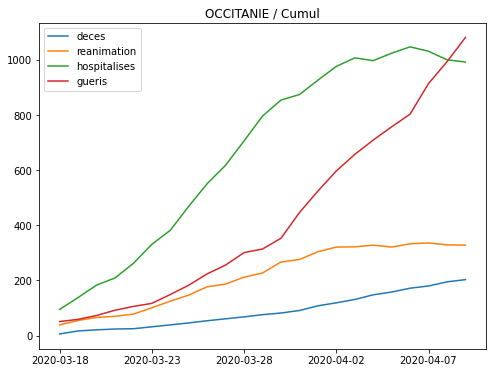

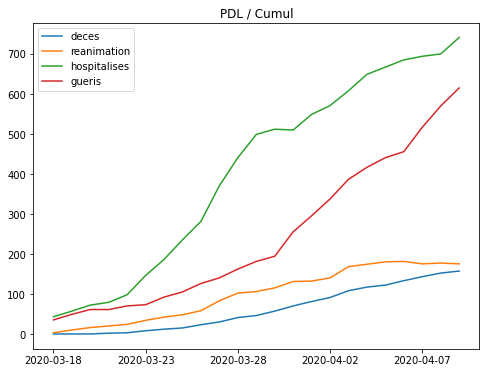

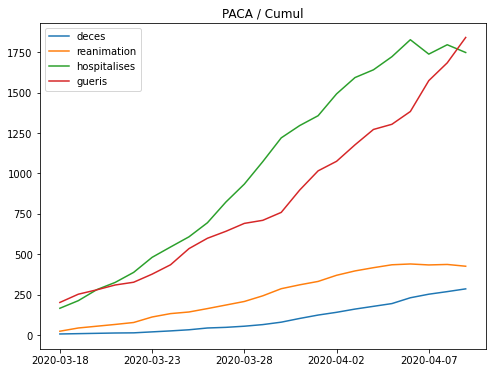

In [15]:
if view_cumul is True:
    get_plot_cumul_multiregions(region_data, keys=keys)

In [16]:
if view_diff is True:
    get_plot_diff_multiregions(keys=keys)

## Focus région spécifique

In [17]:
chosen_region = 'grand-est'

GRAND-EST / CUMUL


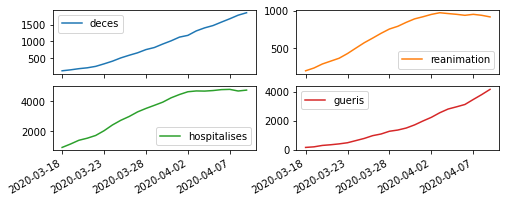

In [18]:
get_plot_cumul_region_separate(chosen_region, region_data, keys=keys)

GRAND-EST / DIFF


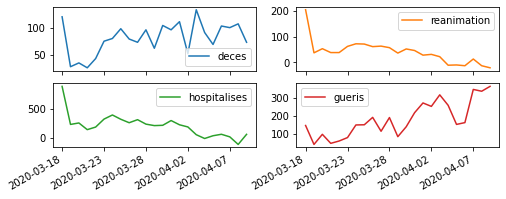

In [19]:
get_plot_diff_region_separate(chosen_region, region_data, keys=keys)

GRAND-EST / CUMUL


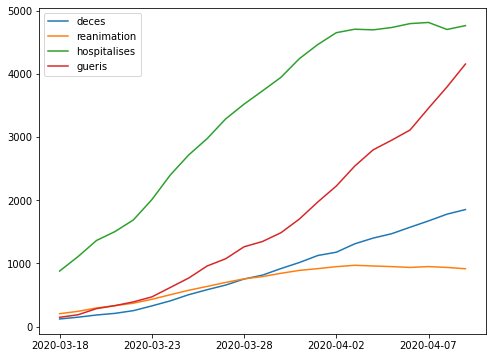

In [20]:
get_plot_cumul_region_merged(chosen_region, region_data, keys=keys)

GRAND-EST / DIFF


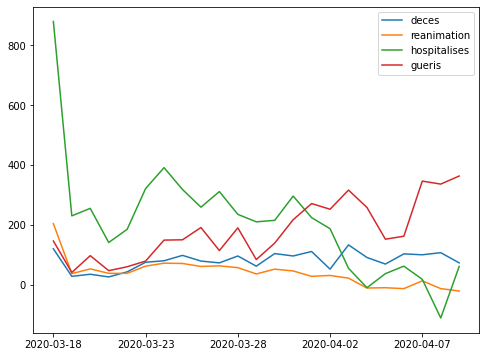

In [21]:
get_plot_diff_region_merged(chosen_region, region_data, keys=keys)